In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_train = pd.read_csv('/content/drive/MyDrive/Data_Science/Retail Sales/retail_sales_dataset.csv')

# Descriptive analysis



In [7]:
df_train.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
df_train['Age'].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64

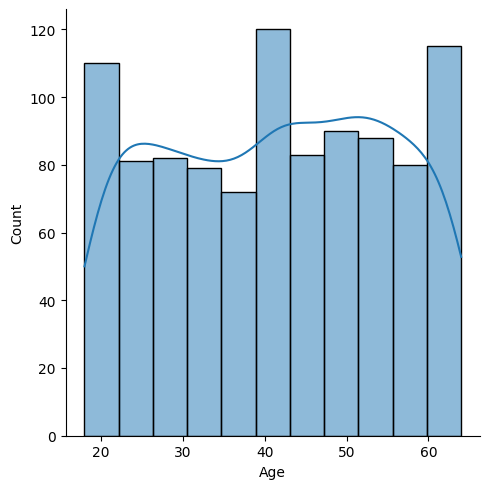

In [9]:
sns.displot(df_train['Age'], kde=True)

In [10]:
df_train['Quantity'].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

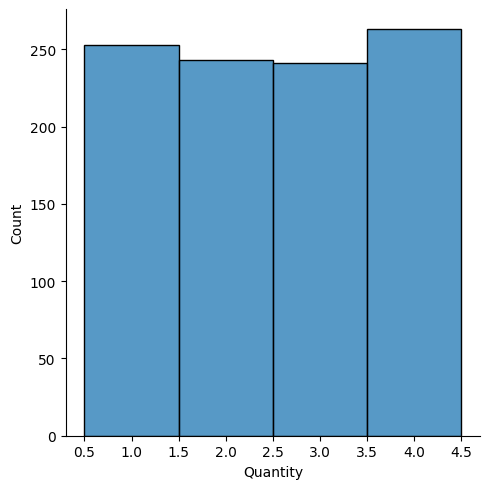

In [11]:
sns.displot(df_train['Quantity'], bins=[0,1,2,3,4,5,6], discrete=True)

In [12]:
df_train['Price per Unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

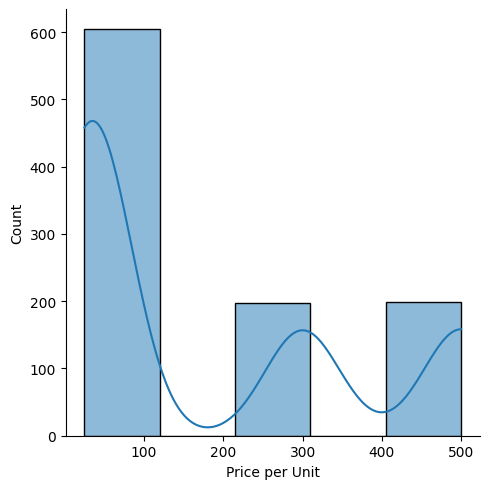

In [13]:
sns.displot(x = df_train['Price per Unit'], binwidth=100, kde=True)

In [14]:
df_train['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

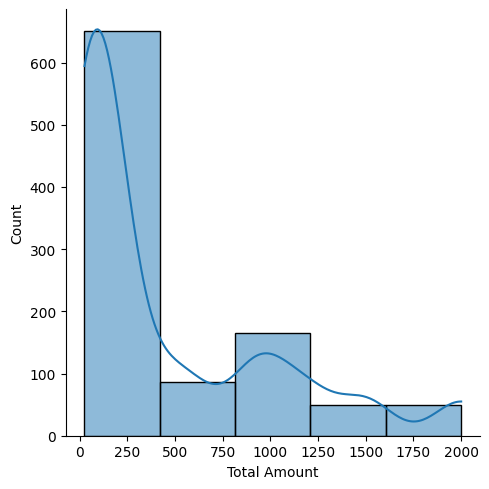

In [15]:
sns.displot(df_train['Total Amount'], kde=True, binwidth= 400)

<Axes: xlabel='Gender', ylabel='count'>

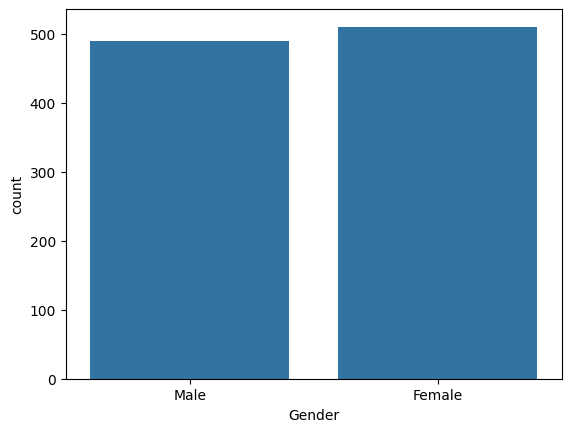

In [16]:
sns.countplot(x=df_train['Gender'])

<Axes: xlabel='Product Category', ylabel='count'>

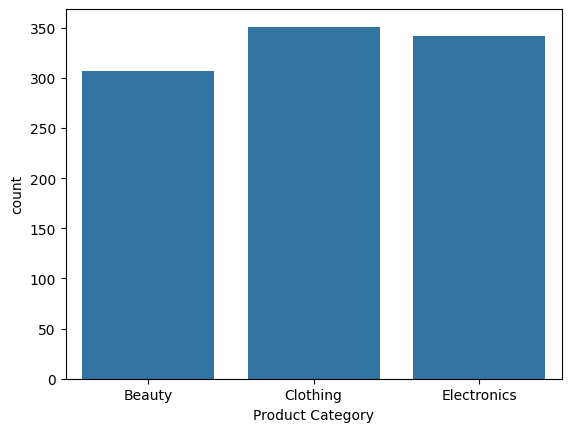

In [17]:
sns.countplot(x=df_train['Product Category'])

In [18]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

monthly_sales = df_train.groupby(df_train['Date'].dt.to_period('M'))['Total Amount'].sum()


monthly_sales = monthly_sales.reset_index()

monthly_sales['Date'] = monthly_sales['Date'].dt.strftime('%Y-%m')



Text(0.5, 1.0, 'Monthly Sales for 2023')

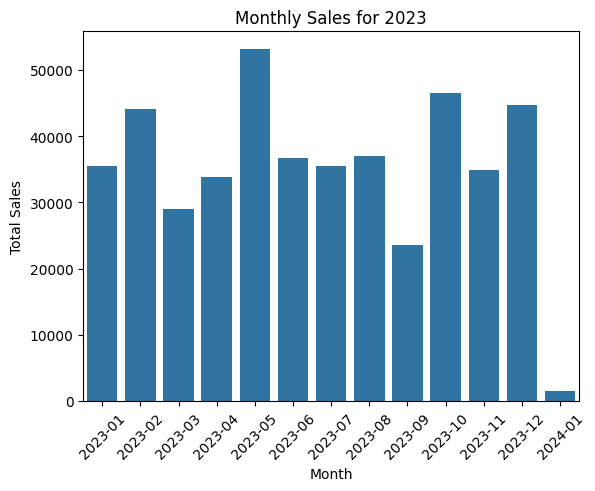

In [19]:
sns.barplot( x = monthly_sales['Date'], y = monthly_sales['Total Amount'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales for 2023')

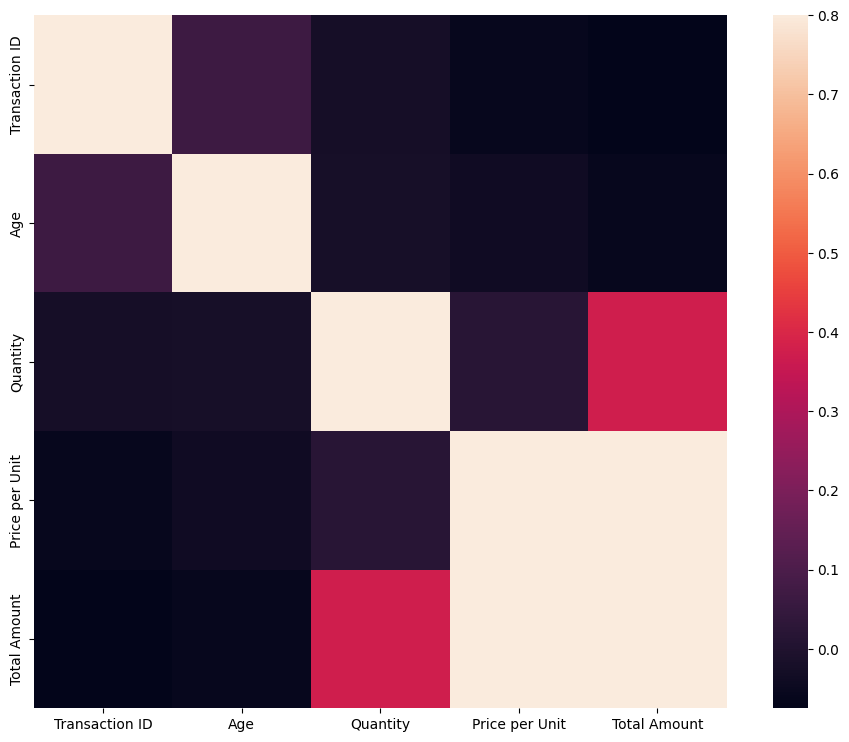

In [20]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<Axes: xlabel='Product Category', ylabel='Total Amount'>

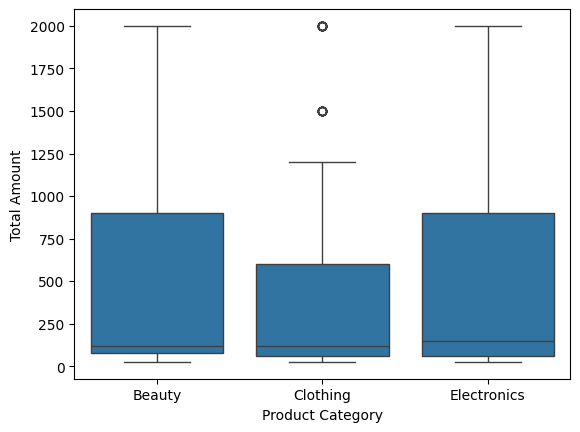

In [21]:
sns.boxplot(data=df_train, x= "Product Category", y= "Total Amount")

(array([19083., 19174., 19266., 19358., 19448., 19539., 19631., 19723.,
        19814., 19905., 19997.]),
 [Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10')])

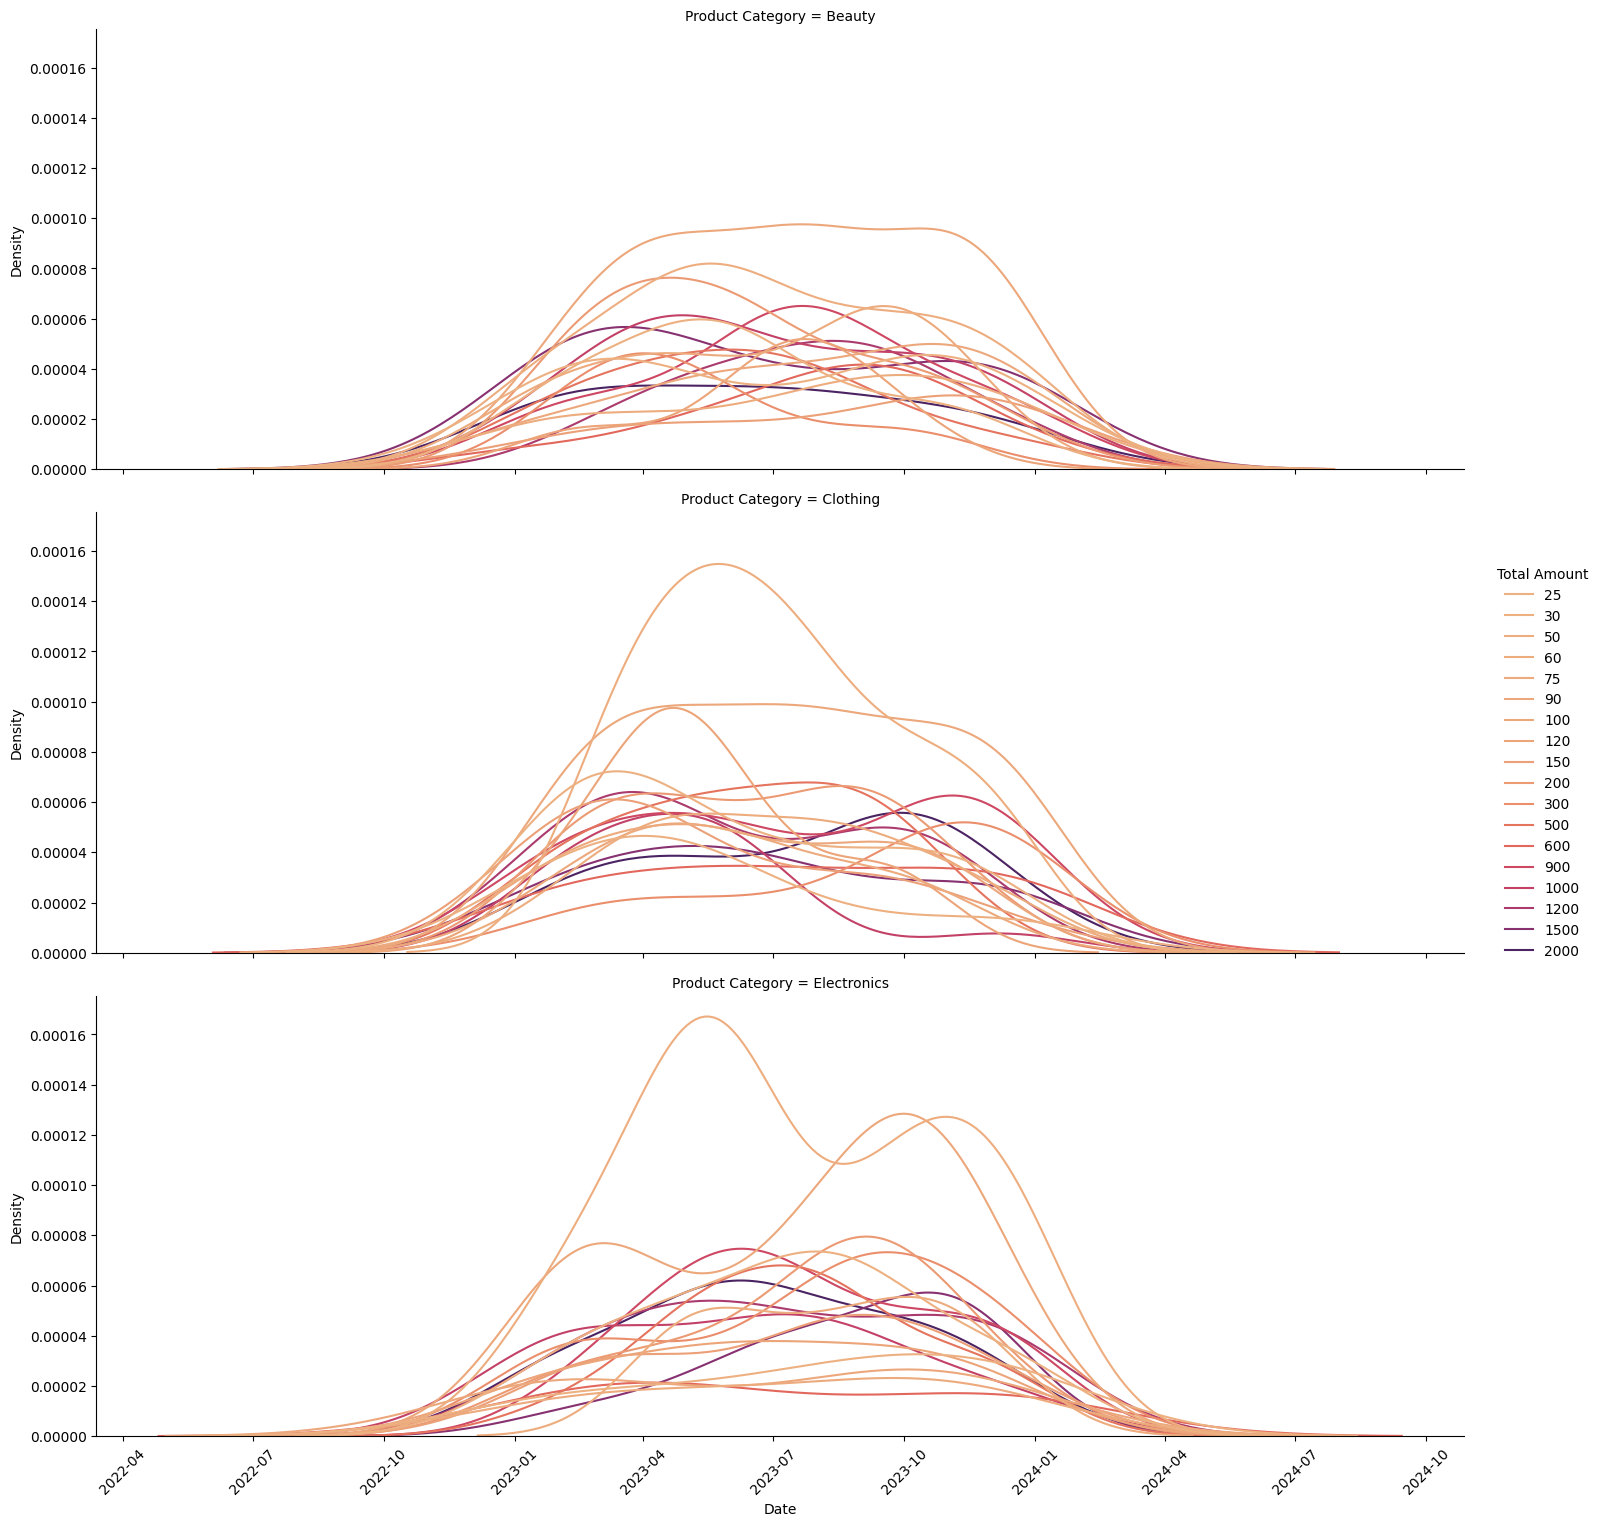

In [22]:
sns.displot(data=df_train, x="Date", hue="Total Amount", col="Product Category", kind="kde", col_wrap=1, aspect=3, palette='flare')
plt.xticks(rotation=45)

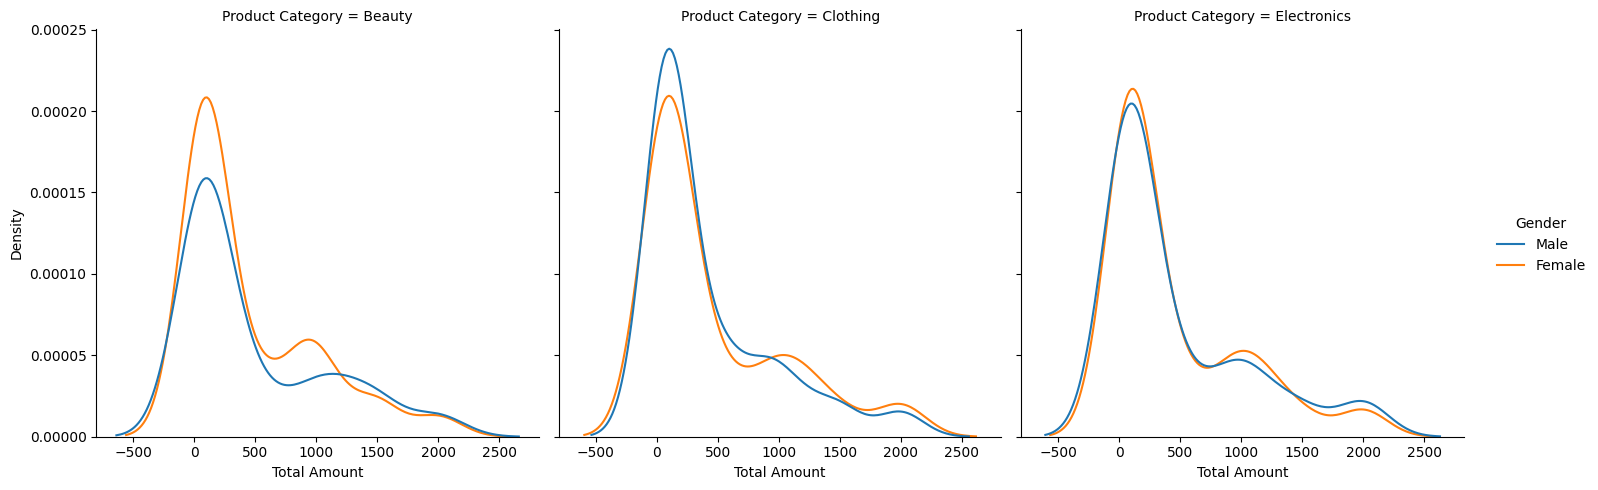

In [23]:
#sns.displot(data=df_train, x="Total Amount", hue="Product Category", col="Gender", kind="kde")

sns.displot(data=df_train, x="Total Amount", hue="Gender", col='Product Category', kind='kde')

<Axes: xlabel='Age', ylabel='Total Amount'>

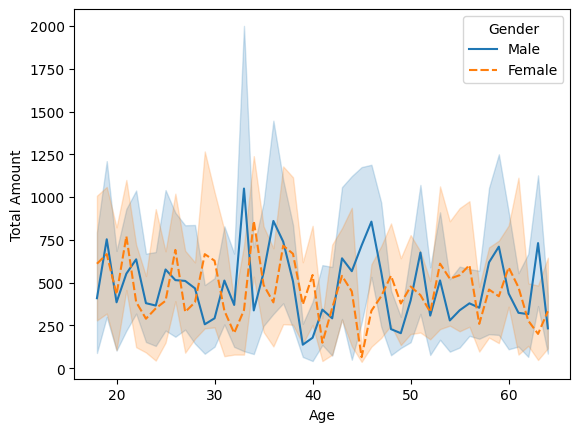

In [24]:
sns.lineplot(data=df_train, x= 'Age', y = 'Total Amount', hue='Gender', style='Gender')

<Axes: xlabel='Age', ylabel='Quantity'>

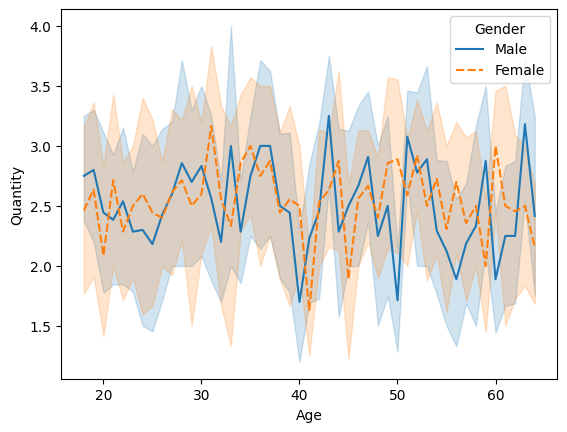

In [25]:
sns.lineplot(data=df_train, x= 'Age', y = 'Quantity', hue='Gender', style='Gender')

# Machine Learning

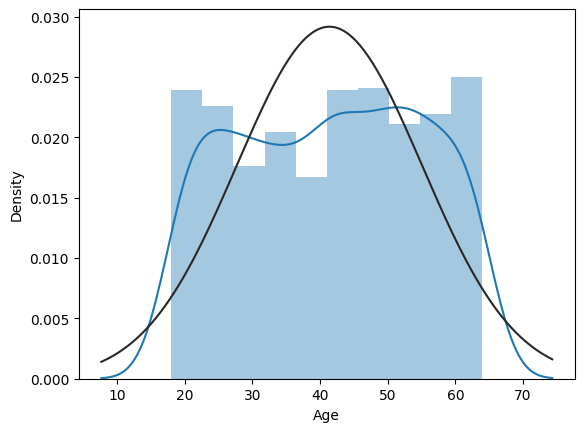

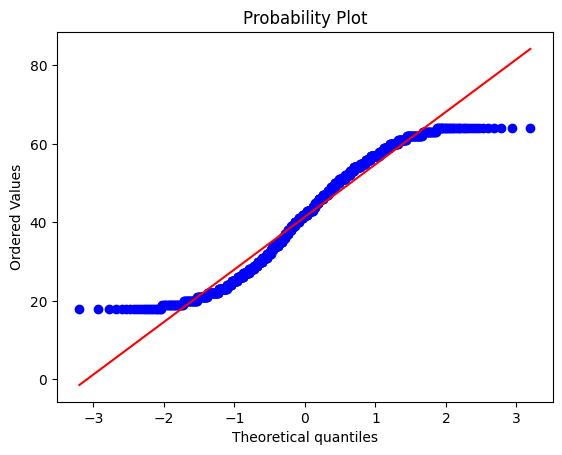

In [26]:
sns.distplot(df_train['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Age'], plot=plt)

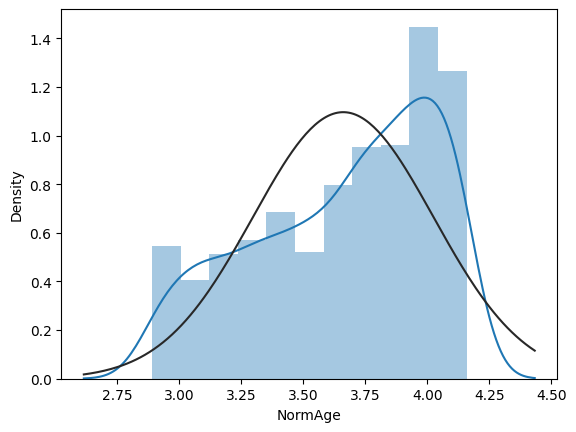

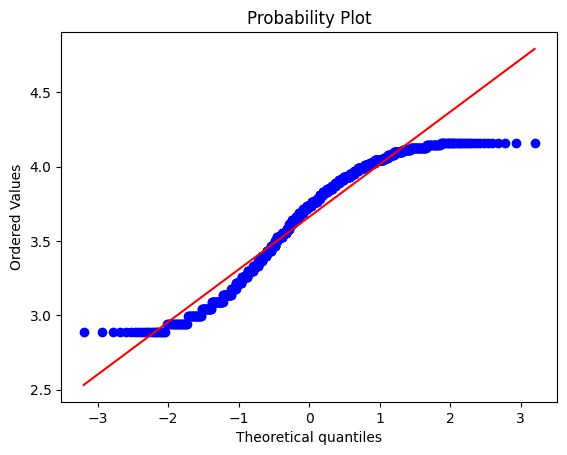

In [27]:
df_train['NormAge'] = np.log(df_train['Age'])
sns.distplot(df_train['NormAge'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NormAge'], plot=plt)

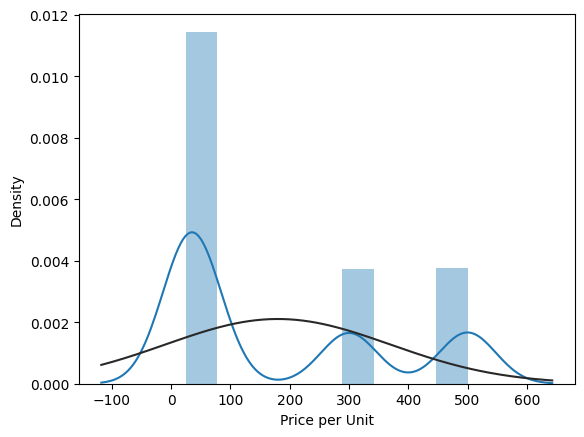

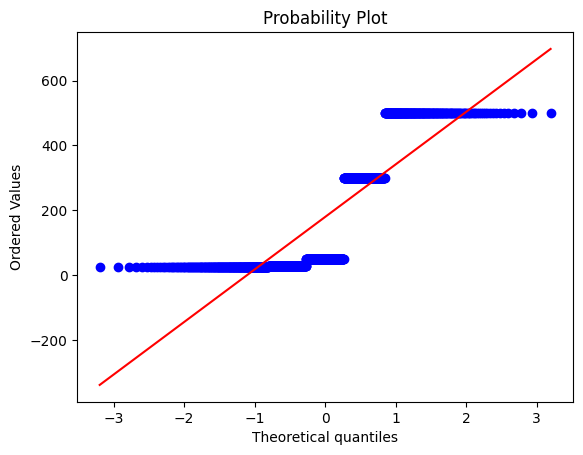

In [28]:
sns.distplot(df_train['Price per Unit'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Price per Unit'], plot=plt)

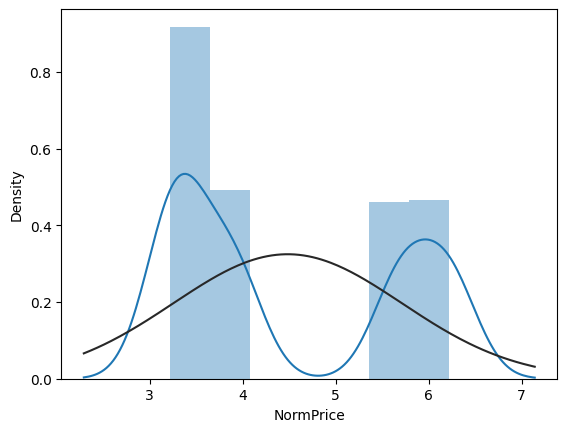

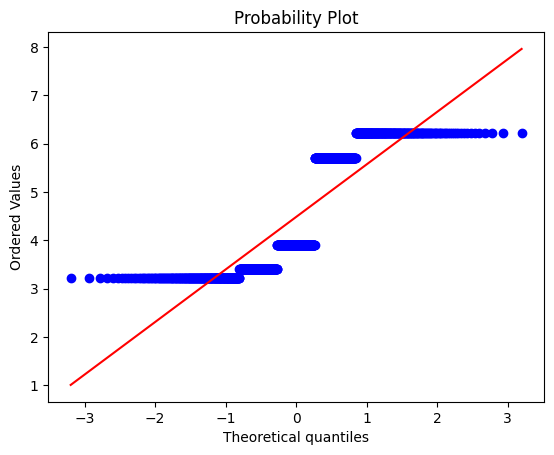

In [29]:
df_train['NormPrice'] = np.log(df_train['Price per Unit'])
sns.distplot(df_train['NormPrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NormPrice'], plot=plt)

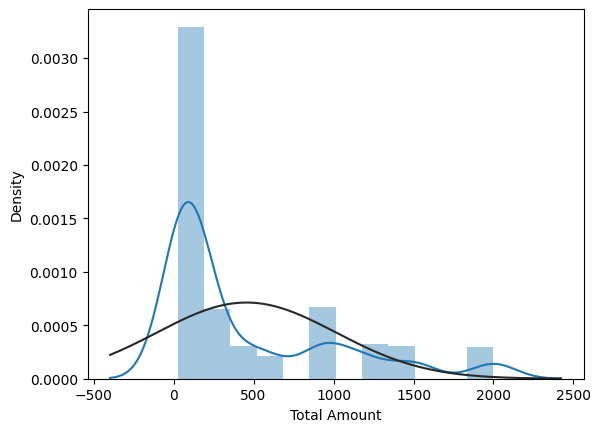

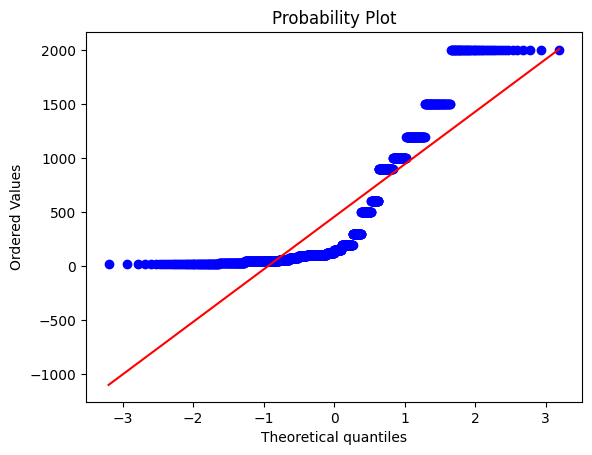

In [30]:
sns.distplot(df_train['Total Amount'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Total Amount'], plot=plt)

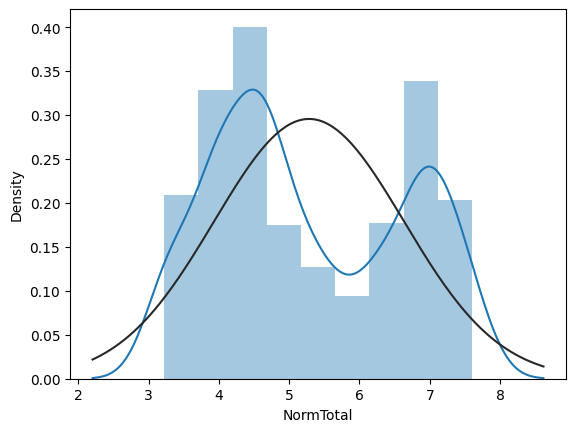

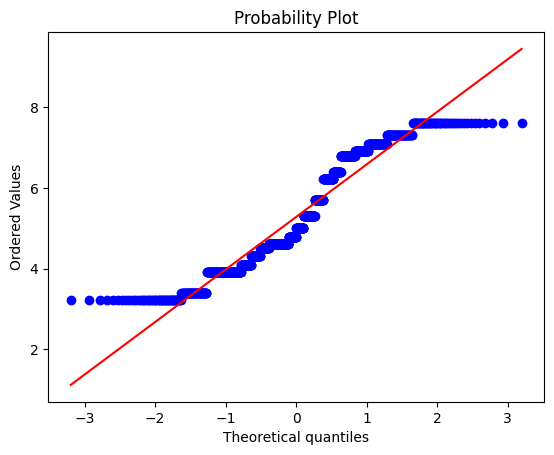

In [31]:
df_train['NormTotal'] = np.log(df_train['Total Amount'])
sns.distplot(df_train['NormTotal'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NormTotal'], plot=plt)

In [32]:
df_train.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,NormAge,NormPrice,NormTotal
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,3.526361,3.912023,5.010635
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,3.258097,6.214608,6.907755
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,3.912023,3.401197,3.401197
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,3.610918,6.214608,6.214608
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,3.401197,3.912023,4.605170


In [33]:
#We now can begin our Machine Learning phase, first, we are going to set our numeric car features to be used, followed by our categorical features, so we can one hot encode them, so we can use them as well

features = ['NormAge', 'NormPrice', 'NormTotal']
columns_to_encode = ['Product Category', 'Gender']

df_train_en = pd.get_dummies(df_train, columns=columns_to_encode, prefix='Encode')
en_columns = df_train_en.filter(like='Encode')
selected_columns = features + en_columns.columns.tolist()

In [34]:
y = df_train['NormTotal']
X = df_train_en[selected_columns]

In [35]:
X.describe()

,NormAge,NormPrice,NormTotal,Encode_Beauty,Encode_Clothing,Encode_Electronics,Encode_Female,Encode_Male
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000
mean,3.661371,4.484172,5.281968,0.30700,0.351000,0.342000,0.51000,0.49000
std,0.363972,1.228955,1.350495,0.46148,0.477522,0.474617,0.50015,0.50015
min,2.890372,3.218876,3.218876,0.00000,0.000000,0.000000,0.00000,0.00000
25%,3.367296,3.401197,4.094345,0.00000,0.000000,0.000000,0.00000,0.00000
50%,3.737670,3.912023,4.899064,0.00000,0.000000,0.000000,1.00000,0.00000
75%,3.970292,5.703782,6.802395,1.00000,1.000000,1.000000,1.00000,1.00000
max,4.158883,6.214608,7.600902,1.00000,1.000000,1.000000,1.00000,1.00000


In [36]:
X.head()

,NormAge,NormPrice,NormTotal,Encode_Beauty,Encode_Clothing,Encode_Electronics,Encode_Female,Encode_Male
0,3.526361,3.912023,5.010635,1,0,0,0,1
1,3.258097,6.214608,6.907755,0,1,0,1,0
2,3.912023,3.401197,3.401197,0,0,1,0,1
3,3.610918,6.214608,6.214608,0,1,0,0,1
4,3.401197,3.912023,4.605170,1,0,0,0,1


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


alpha = 1
retail_model = LinearRegression()
retail_model.fit(X, y)

LinearRegression()

In [38]:
y_pred = retail_model.predict(X)

In [39]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.813904871478857e-31


In [40]:
print("Making predictions for the following 5 customers:")
print(X.head())
print("The predictions are")
print(retail_model.predict(X.head()))

Making predictions for the following 5 customers:
    NormAge  NormPrice  NormTotal  Encode_Beauty  Encode_Clothing  \
0  3.526361   3.912023   5.010635              1                0   
1  3.258097   6.214608   6.907755              0                1   
2  3.912023   3.401197   3.401197              0                0   
3  3.610918   6.214608   6.214608              0                1   
4  3.401197   3.912023   4.605170              1                0   

   Encode_Electronics  Encode_Female  Encode_Male  
0                   0              0            1  
1                   0              1            0  
2                   1              0            1  
3                   0              0            1  
4                   0              0            1  
The predictions are
[5.01063529 6.90775528 3.40119738 6.2146081  4.60517019]


In [41]:
normalized_predictions = np.array([y_pred])

original_pvalues = np.exp(normalized_predictions)

print(original_pvalues)


[[ 150. 1000.   30.  500.  100.   30.   50.  100.  600.  200.  100.   75.
  1500.  120. 2000. 1500.  100.   50.   50.  900.  500.  100.  120.  300.
    50. 1000.   50.  500.   30.  900. 1200.   90.  100.  150.  900.  900.
    75.  200.  120.   50.   50.  900.  300.   25.   30. 1200. 1500.  900.
  1000.   75.   75.  300.  100. 1500.  120.  900.   30. 1200.   50.  150.
   200.  100.   50.  100. 2000.   30. 1200.  300.   75.  300.  100. 2000.
    90. 2000.  200.  100.  100. 1500.  300.   60.   50.  200.  100.   90.
   150.   90.  100.  500. 2000.   30.  500.  120. 2000. 1000.   60.  600.
  1000.  100. 1200.   30.  600.   50.   25. 1000.  500.   50. 1200.   75.
  2000.  900. 1500. 1500.   50.  100. 1500.   30. 1000. 2000.  150.   50.
   200.  120.   60. 2000.  100.   90.   50.  500.  600.  500.  600.  200.
   900.   50.   50.  600. 1000.  200. 2000.   30.   50. 1200.   50. 1500.
    75.  200.  300.   60.   75.  120.   50. 2000. 1000.  900. 2000.  100.
  2000.  600.  200.  100. 1000.   60. 

In [47]:
original_pvalues = original_pvalues.ravel()
df_pvalues = pd.DataFrame({'Price_predictions': original_pvalues})

df_with_predictions = pd.concat([df_train, df_pvalues], axis=1)

df_with_predictions.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,NormAge,NormPrice,NormTotal,Price_predictions
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,3.526361,3.912023,5.010635,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,3.258097,6.214608,6.907755,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,3.912023,3.401197,3.401197,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,3.610918,6.214608,6.214608,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,3.401197,3.912023,4.605170,100.0


In [43]:
#import joblib

#model_filename = 'retail_regression_model.pkl'
joblib.dump(retail_model, model_filename)